In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
data = pd.read_excel('TS_Data.xlsx')

In [3]:
data = data.tail(-1)

In [4]:
data = data[["Date","Marketing spends"]]
data.columns = ["Date","Value"]

In [5]:
data

,Date,Value
1,2017-01-01,176732
2,2017-02-01,180486
3,2017-03-01,180455
4,2017-04-01,185070
5,2017-05-01,195915
6,2017-06-01,194849
7,2017-07-01,175999
8,2017-08-01,167606
9,2017-09-01,204624
10,2017-10-01,208619


In [6]:
data.isnull().sum()

Date     0
Value    0
dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.index = data['Date']

In [9]:
data = data.drop(columns=['Date'])

In [10]:
data

,Value
Date,
2017-01-01,176732
2017-02-01,180486
2017-03-01,180455
2017-04-01,185070
2017-05-01,195915
2017-06-01,194849
2017-07-01,175999
2017-08-01,167606
2017-09-01,204624


In [11]:
result = seasonal_decompose(data['Value'])

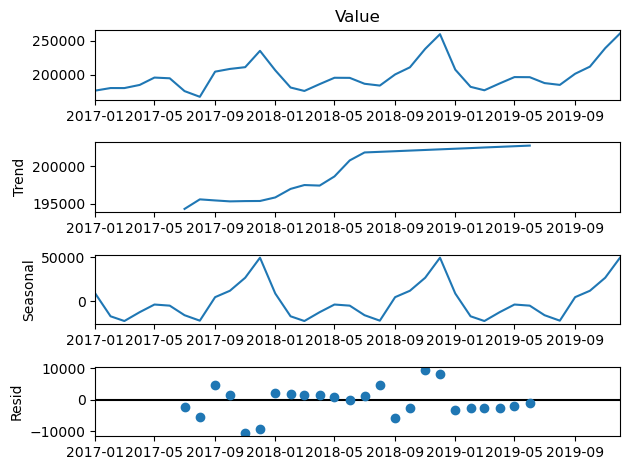

In [12]:
result.plot()
plt.show()

In [13]:
data['dt'] = data.index

In [14]:
type(data['dt'])

pandas.core.series.Series

In [15]:
data['dt'] = pd.to_datetime(data['dt'])

In [16]:
train = data[data['dt'].dt.year<2019]
test = data[data['dt'].dt.year>2018]

In [17]:
train.drop(columns=['dt'], inplace = True)
test.drop(columns=['dt'], inplace = True)

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_26043/4112128423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['dt'], inplace = True)
/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_26043/4112128423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['dt'], inplace = True)


In [18]:
data_smooth = pd.DataFrame(range(1,37), columns=['X'])


In [19]:
data['X'] = data_smooth['X'].values

In [22]:
data

,Value,dt,X
Date,,,
2017-01-01,176732,2017-01-01,1
2017-02-01,180486,2017-02-01,2
2017-03-01,180455,2017-03-01,3
2017-04-01,185070,2017-04-01,4
2017-05-01,195915,2017-05-01,5
2017-06-01,194849,2017-06-01,6
2017-07-01,175999,2017-07-01,7
2017-08-01,167606,2017-08-01,8
2017-09-01,204624,2017-09-01,9


# Checking Stationary Properties

In [23]:
from statsmodels.tsa.stattools import adfuller

In [27]:
print("Observations of Dickey-fuller test")
dftest = adfuller(data['Value'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                 -1.634450
p-value                         0.465162
#lags used                     10.000000
number of observations used    25.000000
critical value (1%)            -3.723863
critical value (5%)            -2.986489
critical value (10%)           -2.632800
dtype: float64


In [28]:
# Reject Null Hypothesis
# Not a Stationary 
# We need to differencing

In [30]:
data['Differencing_with_1'] = data['Value'] - data['Value'].shift(1)

In [32]:
print("Observations of Dickey-fuller test")
dftest = adfuller(data['Differencing_with_1'].dropna(),autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -6.672291e+00
p-value                        4.555742e-09
#lags used                     1.000000e+01
number of observations used    2.400000e+01
critical value (1%)           -3.737709e+00
critical value (5%)           -2.992216e+00
critical value (10%)          -2.635747e+00
dtype: float64


In [33]:
4.555742e-09

4.555742e-09

In [34]:
'{:f}'.format(4.555742e-09)

'0.000000'

In [ ]:
# Accept Null Hypothesis
# Stationary 


In [76]:
model = auto_arima(y = data['Value'], start_p=0, start_q=0,
                      max_p=3, max_q=3,
                      d = 1,
                      trace=True,
                   with_intercept = True                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=787.906, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=789.263, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=789.189, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=786.560, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=790.823, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.098 seconds


In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -392.280
Date:                Sun, 15 Oct 2023   AIC                            786.560
Time:                        10:33:19   BIC                            788.116
Sample:                    01-01-2017   HQIC                           787.097
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.092e+08   6.21e+07      4.976      0.000    1.87e+08    4.31e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.15   Jarque-Bera (JB):                 5.08
Prob(Q):                              0.14   Prob(JB):                         0.08
Heteroskedasticity (H):               1.55   Skew:                            -0.75
Prob(H) (two-sided):                  0.46   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
pd.DataFrame(model.predict(n_periods = 12), columns = ['Forecast'])

,Forecast
2020-01-01,260756.0
2020-02-01,260756.0
2020-03-01,260756.0
2020-04-01,260756.0
2020-05-01,260756.0
2020-06-01,260756.0
2020-07-01,260756.0
2020-08-01,260756.0
2020-09-01,260756.0
2020-10-01,260756.0


In [198]:
import statsmodels as sm
mod = sm.tsa.arima.model.ARIMA(endog = np.array(data['Value'].astype('float')), order=(1, 0, 0))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -401.955
Date:                Sun, 15 Oct 2023   AIC                            809.911
Time:                        11:08:45   BIC                            814.661
Sample:                             0   HQIC                           811.569
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.992e+05   1.12e+04     17.799      0.000    1.77e+05    2.21e+05
ar.L1          0.7231      0.106      6.828      0.000       0.516       0.931
sigma2      2.875e+08      0.565   5.08e+08      0.0

In [199]:
forecast = res.predict(start = 37, end = 60)

In [200]:
import seaborn as sns

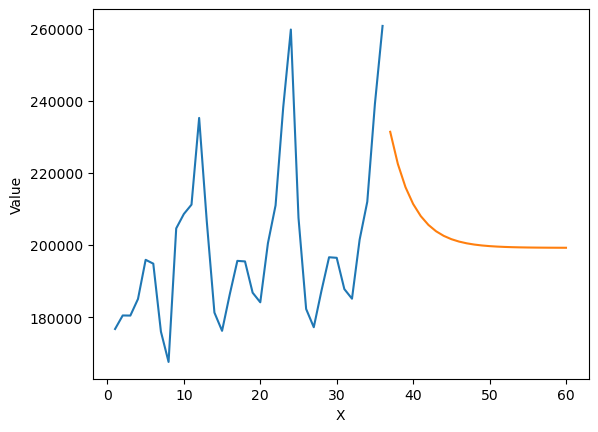

In [201]:
sns.lineplot(x = data['X'], y = data['Value'])
sns.lineplot(x = range(37,61), y = forecast)
plt.show()

In [137]:
import statsmodels as sm
mod = sm.tsa.arima.model.ARIMA(endog = np.array(data['Value'].astype('float')), order=(1, 0, 1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -397.285
Date:                Sun, 15 Oct 2023   AIC                            802.569
Time:                        10:49:29   BIC                            808.903
Sample:                             0   HQIC                           804.780
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.992e+05   1.03e+04     19.413      0.000    1.79e+05    2.19e+05
ar.L1          0.4020      0.176      2.279      0.023       0.056       0.748
ma.L1          0.7474      0.199      3.752      0.0

In [138]:
forecast = res.predict(start = 37, end = 60)

In [139]:
import seaborn as sns

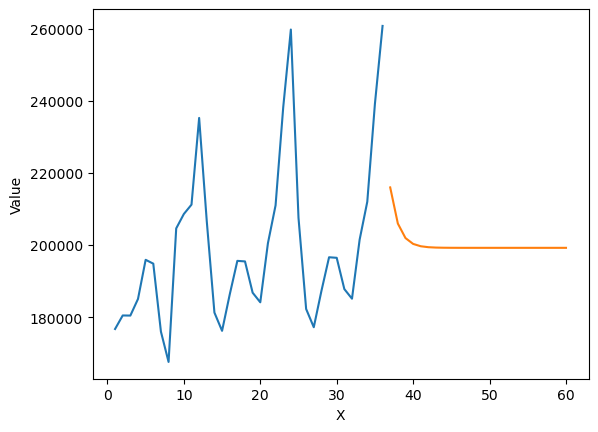

In [140]:
sns.lineplot(x = data['X'], y = data['Value'])
sns.lineplot(x = range(37,61), y = forecast)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -391.832
Date:                Sun, 15 Oct 2023   AIC                            787.665
Time:                        11:08:24   BIC                            790.775
Sample:                             0   HQIC                           788.739
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0816      0.109      0.752      0.452      -0.131       0.294
sigma2      3.063e+08   6.86e-11   4.47e+18      0.000    3.06e+08    3.06e+08
Ljung-Box (L1) (Q):                   1.33   Jarque-

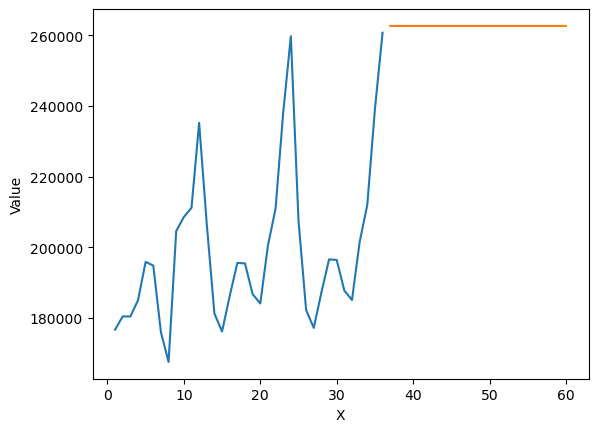

In [192]:


import statsmodels as sm
mod = sm.tsa.arima.model.ARIMA(endog = np.array(data['Value'].astype('float')), order=(1, 1, 0))
res = mod.fit()
print(res.summary())

forecast = res.predict(start = 37, end = 60)

import seaborn as sns

sns.lineplot(x = data['X'], y = data['Value'])
sns.lineplot(x = range(37,61), y = forecast)
plt.show()

In [193]:
from prophet import Prophet

In [194]:
data['ds'] = data.index
data['y'] = data['Value']

In [195]:
data_inp = data[['ds','y']]

In [196]:
m = Prophet()
m.fit(data_inp)

11:08:26 - cmdstanpy - INFO - Chain [1] start processing
11:08:26 - cmdstanpy - INFO - Chain [1] done processing


In [197]:
future = m.make_future_dataframe(periods=24, freq='M')
future.tail()

,ds
55,2021-07-31
56,2021-08-31
57,2021-09-30
58,2021-10-31
59,2021-11-30


In [188]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2017-01-01,184629.105491,178886.825558,189869.966424
1,2017-02-01,181239.527223,175241.101130,186970.925747
2,2017-03-01,177414.813271,171797.115083,183474.875881
3,2017-04-01,180820.799923,174941.440759,186437.938580
4,2017-05-01,190597.596808,184786.120230,196106.423678
5,2017-06-01,190202.178452,184438.423091,196142.254369
6,2017-07-01,174693.436555,169131.134396,180527.972999
7,2017-08-01,169634.223619,163873.074290,174970.164090
8,2017-09-01,205707.277922,199829.519646,211258.670126
9,2017-10-01,212771.614284,207090.079888,218182.322010


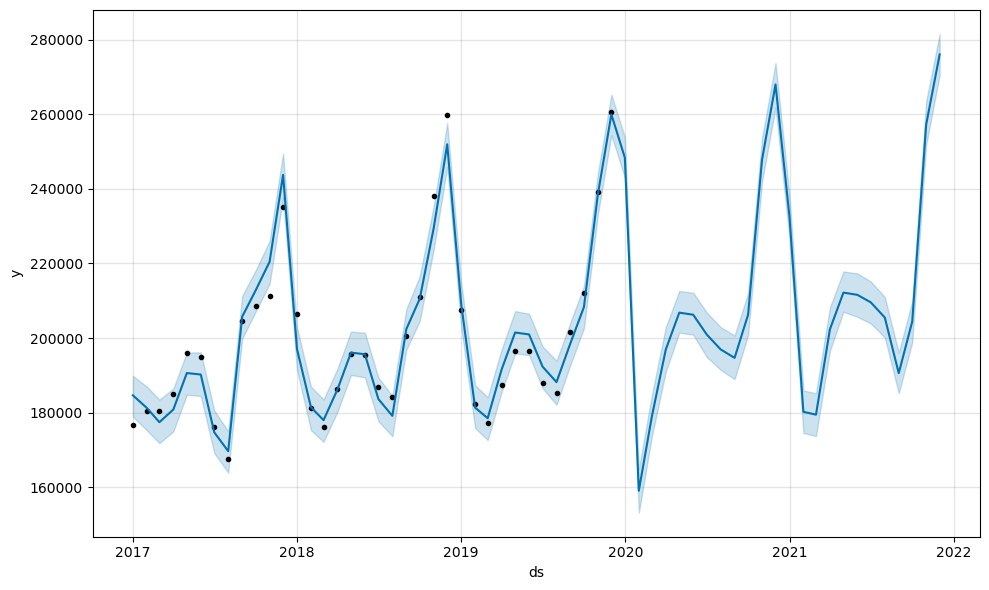

In [189]:
fig1 = m.plot(forecast)


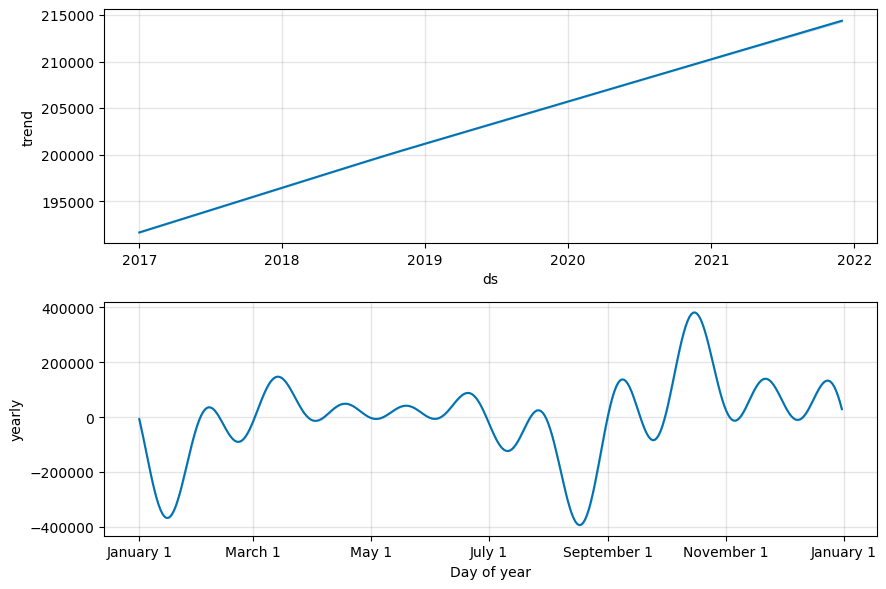

In [190]:
fig2 = m.plot_components(forecast)


In [191]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)